In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("Titanic_ship.csv")

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Data Reduction

In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


##Data Cleaning

In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [ ]:
df['Embarked'].fillna('S',inplace=True)

In [ ]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 775 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  775 non-null    int64  
 1   Pclass    775 non-null    int64  
 2   Sex       775 non-null    object 
 3   Age       775 non-null    float64
 4   SibSp     775 non-null    int64  
 5   Parch     775 non-null    int64  
 6   Fare      775 non-null    float64
 7   Embarked  775 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 54.5+ KB


In [ ]:
df.shape

(775, 8)

<Axes: ylabel='Fare'>

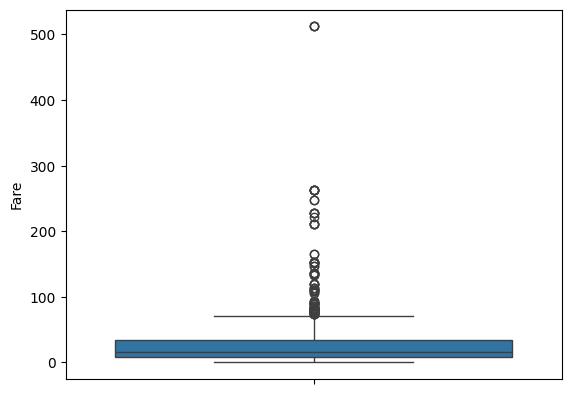

In [ ]:
sns.boxplot(df['Fare'])

In [ ]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalization
scaler = MinMaxScaler()
df[['Age','Fare']] = scaler.fit_transform(df[['Age','Fare']])

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.271174,1,0,0.014151,S
1,1,1,female,0.472229,1,0,0.139136,C
2,1,3,female,0.321438,0,0,0.015469,S
3,1,1,female,0.434531,1,0,0.103644,S
4,0,3,male,0.434531,0,0,0.015713,S


## Categorical Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
encoder_data = encoder.fit_transform(df[['Sex','Embarked']])
print(encoder_data.toarray())

[[0. 1. 0. 0. 1.]
 [1. 0. 1. 0. 0.]
 [1. 0. 0. 0. 1.]
 ...
 [1. 0. 0. 0. 1.]
 [0. 1. 1. 0. 0.]
 [0. 1. 0. 1. 0.]]


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,0.271174,1,0,0.014151,S
1,1,1,female,0.472229,1,0,0.139136,C
2,1,3,female,0.321438,0,0,0.015469,S
3,1,1,female,0.434531,1,0,0.103644,S
4,0,3,male,0.434531,0,0,0.015713,S


In [ ]:
# Alternate Method   --   # GETDUMMIES

df['Sex'].replace(to_replace='male',value=1,inplace=True)
df['Sex'].replace(to_replace='female',value=0,inplace=True)

In [ ]:
df['Embarked'].replace(to_replace='S',value=1,inplace=True)
df['Embarked'].replace(to_replace='C',value=2,inplace=True)
df['Embarked'].replace(to_replace='Q',value=3,inplace=True)


In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,0.271174,1,0,0.014151,1
1,1,1,0,0.472229,1,0,0.139136,2
2,1,3,0,0.321438,0,0,0.015469,1
3,1,1,0,0.434531,1,0,0.103644,1
4,0,3,1,0.434531,0,0,0.015713,1


##Feature Engineering  - Getting some new values -- Data Transformation

In [ ]:
df['Family_size'] = df['SibSp'] + df['Parch']

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,0,3,1,0.271174,1,0,0.014151,1,1
1,1,1,0,0.472229,1,0,0.139136,2,1
2,1,3,0,0.321438,0,0,0.015469,1,0
3,1,1,0,0.434531,1,0,0.103644,1,1
4,0,3,1,0.434531,0,0,0.015713,1,0


#Data Discreteization

In [ ]:
dummydf = pd.read_csv("Titanic_ship.csv")

In [ ]:
dummydf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<ipython-input-28-e51db4921d7f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dummydf['Age'])


<Axes: xlabel='Age', ylabel='Density'>

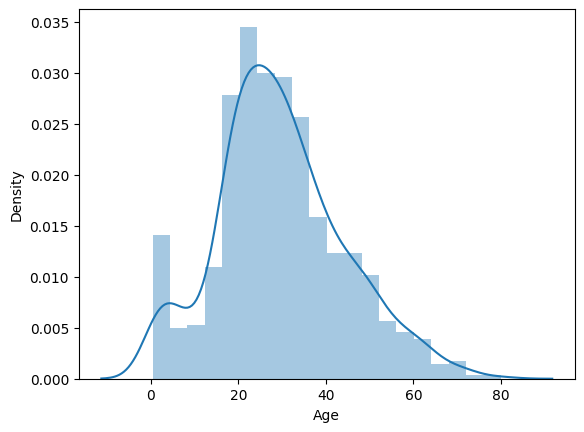

In [ ]:
sns.distplot(dummydf['Age'])

In [ ]:
dummydf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### 0-10  - Child
##### 10-30 - Teenager
##### 30-50 - Adult
##### 50-80 - SeniorCitizen

In [ ]:
bins = [0,10,30,50,80]
labels = ['Children','Teenager','Adult','SeniorCitizen']
df['Age_Category'] = pd.cut(dummydf['Age'],bins=bins,labels=labels)

In [ ]:
df.sample(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Age_Category
517,0,3,1,0.346569,0,0,0.047138,3,0,NaN
577,1,1,0,0.484795,1,0,0.109110,1,1,Adult
535,1,2,0,0.082684,0,2,0.051237,1,2,Children
0,0,3,1,0.271174,1,0,0.014151,1,1,Teenager
461,0,3,1,0.421965,0,0,0.015713,1,0,Adult
70,0,2,1,0.396833,0,0,0.020495,1,0,Adult
169,0,3,1,0.346569,0,0,0.110272,1,0,Teenager
643,1,3,1,0.346569,0,0,0.110272,1,0,NaN
582,0,2,1,0.673285,0,0,0.050749,1,0,SeniorCitizen
82,1,3,0,0.346569,0,0,0.015200,3,0,NaN


In [ ]:
df['Age_Category'].value_counts()

Teenager         318
Adult            231
Children          63
SeniorCitizen     63
Name: Age_Category, dtype: int64

##Data Balancing

In [ ]:
df['Survived'].value_counts()

0    455
1    320
Name: Survived, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x = df.drop(['Survived','Age_Category'],axis=1)
y = df['Survived']

In [ ]:
x,y = sm.fit_resample(x,y)

In [ ]:
y.value_counts()

0    455
1    455
Name: Survived, dtype: int64

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Age_Category
0,0,3,1,0.271174,1,0,0.014151,1,1,Teenager
1,1,1,0,0.472229,1,0,0.139136,2,1,Adult
2,1,3,0,0.321438,0,0,0.015469,1,0,Teenager
3,1,1,0,0.434531,1,0,0.103644,1,1,Adult
4,0,3,1,0.434531,0,0,0.015713,1,0,Adult


In [ ]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size,Age_Category
289,1,3,0,0.271174,0,0,0.015127,3,0,Teenager


## Droping Columns

In [ ]:
df.drop(['Age_Category'],axis=1,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
0,0,3,1,0.271174,1,0,0.014151,1,1
1,1,1,0,0.472229,1,0,0.139136,2,1
2,1,3,0,0.321438,0,0,0.015469,1,0
3,1,1,0,0.434531,1,0,0.103644,1,1
4,0,3,1,0.434531,0,0,0.015713,1,0


In [ ]:
df.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_size
513,1,1,0,0.673285,1,0,0.115941,2,1
582,0,2,1,0.673285,0,0,0.050749,1,0
460,1,1,1,0.597889,0,0,0.051822,1,0
270,0,1,1,0.346569,0,0,0.060508,1,0
495,0,3,1,0.346569,0,0,0.028221,2,0


## I have Cleaned the Data, Dataset is ready for Modelling. First i Save the Cleaned file csv

In [ ]:
df.to_csv('CleanTitanic.csv')